In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn


# In[40]:


df = pd.read_csv('heart.csv')
df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


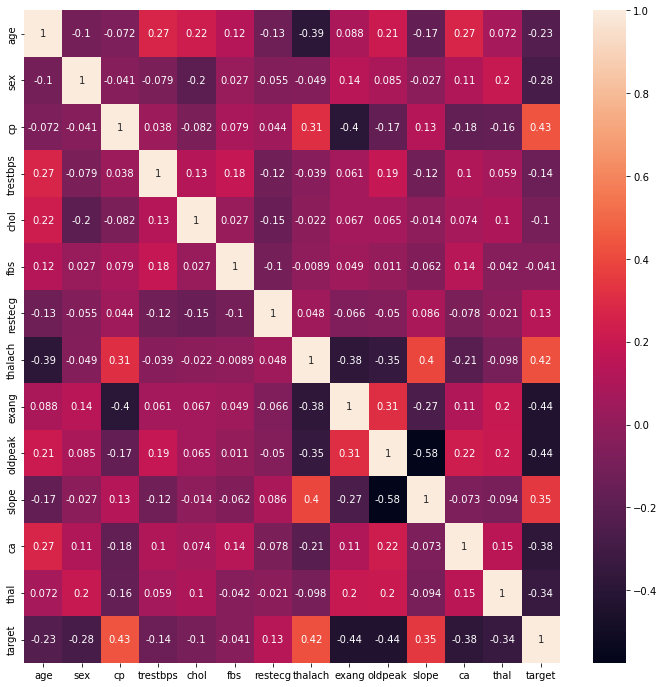

In [43]:
corrMatrix = df.corr()
plt.figure(figsize=(12, 12))
sn.heatmap(corrMatrix, annot=True)
plt.show()

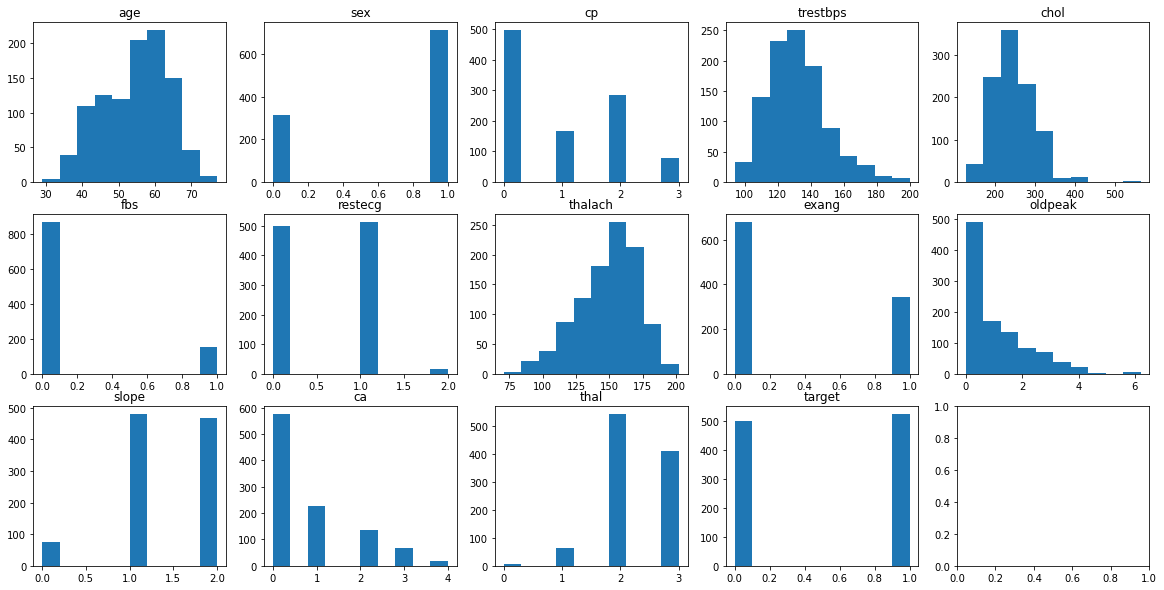

In [44]:
fig, axs = plt.subplots(nrows=3, ncols=5, figsize=(20, 10))

# loop over each column in the dataframe and plot a histogram on the corresponding subplot
for i, column in enumerate(df.columns):
    row = i // 5
    col = i % 5
    axs[row, col].hist(df[column])
    axs[row, col].set_title(column)


In [45]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [46]:
nan_df = df.isna()
nan_df.sum()


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [47]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
threshold = 1.5
lower_bound = Q1 - threshold * IQR
upper_bound = Q3 + threshold * IQR
outliers = (df < lower_bound) | (df > upper_bound)
df_outliers = df.loc[outliers.any(axis=1)]
df_outliers

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
11,43,0,0,132,341,1,0,136,1,3.0,1,0,3,0
13,51,1,0,140,298,0,1,122,1,4.2,1,3,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1003,52,1,0,108,233,1,1,147,0,0.1,2,3,3,1
1006,58,1,2,140,211,1,0,165,0,0.0,2,0,2,1
1013,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
1015,58,1,0,128,216,0,0,131,1,2.2,1,3,3,0


In [48]:
df_dot = df[~outliers.any(axis=1)]
df_dot

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
7,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


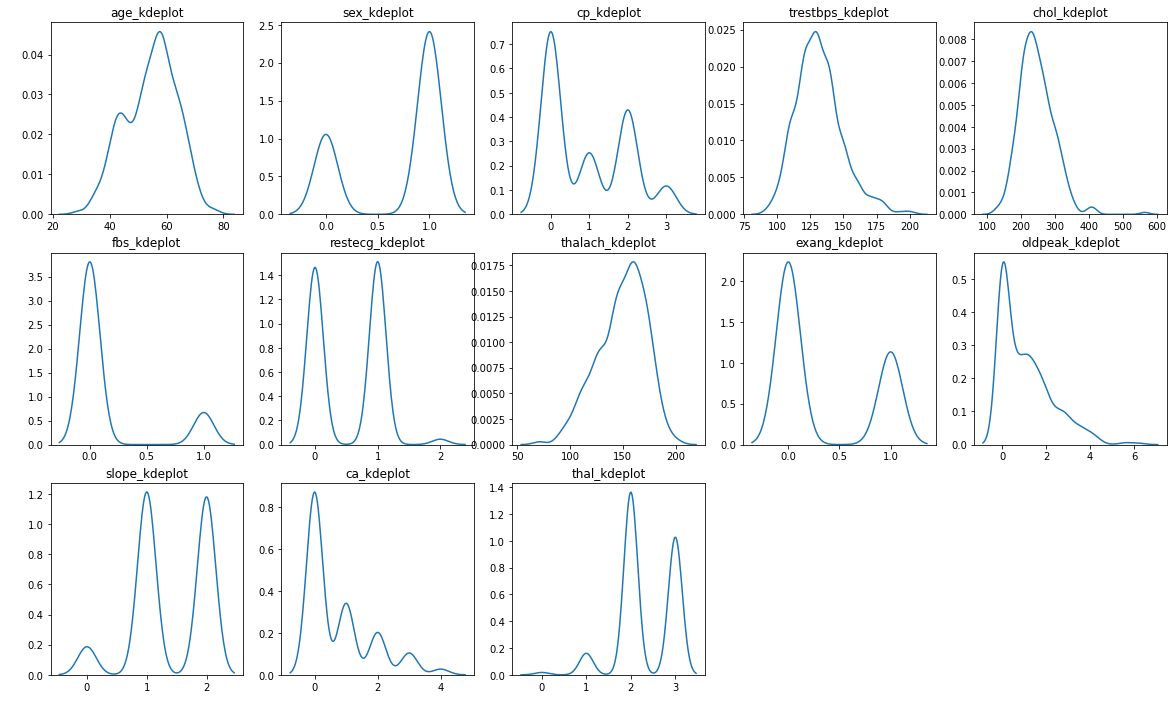

In [49]:
feature_list = df.columns.tolist()
feature_list.remove("target")

cols = 5
n=len(feature_list)

rows = int(np.ceil(n/cols))
plt.figure(figsize=(cols*4 , rows*4))

i=0
for val in feature_list:
    i += 1
    plt.subplot(rows, cols, i)
    sn.kdeplot(x=val,data=df)
    plt.ylabel(" ")
    plt.xlabel(" ")
    plt.title(val +"_kdeplot")

In [50]:
#create dummy variable

a = pd.get_dummies(df['cp'], prefix = "cp")
b = pd.get_dummies(df['thal'], prefix = "thal")
c = pd.get_dummies(df['slope'], prefix = "slope")
frames = [df, a, b, c]
df = pd.concat(frames, axis = 1)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,52,1,0,125,212,0,1,168,0,1.0,...,0,0,0,0,0,0,1,0,0,1
1,53,1,0,140,203,1,0,155,1,3.1,...,0,0,0,0,0,0,1,1,0,0
2,70,1,0,145,174,0,1,125,1,2.6,...,0,0,0,0,0,0,1,1,0,0
3,61,1,0,148,203,0,1,161,0,0.0,...,0,0,0,0,0,0,1,0,0,1
4,62,0,0,138,294,1,1,106,0,1.9,...,0,0,0,0,0,1,0,0,1,0


In [51]:
df = df.drop(columns = ['cp', 'thal', 'slope'])
df.head()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,52,1,125,212,0,1,168,0,1.0,2,...,0,0,0,0,0,0,1,0,0,1
1,53,1,140,203,1,0,155,1,3.1,0,...,0,0,0,0,0,0,1,1,0,0
2,70,1,145,174,0,1,125,1,2.6,0,...,0,0,0,0,0,0,1,1,0,0
3,61,1,148,203,0,1,161,0,0.0,1,...,0,0,0,0,0,0,1,0,0,1
4,62,0,138,294,1,1,106,0,1.9,3,...,0,0,0,0,0,1,0,0,1,0


In [119]:
from sklearn.model_selection import train_test_split


y = df.target.values
X = df.drop(['target'], axis = 1)
X = (X - np.min(X)) / (np.max(X) - np.min(X)).values
X_train, X_test, Y_train, Y_test = train_test_split(X,y,test_size = 0.2,random_state=1)


In [53]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score


In [54]:
#SVM model

from sklearn.svm import SVC
svm = SVC(random_state = 1)
svm.fit(X_train, Y_train)

acc = svm.score(X_test,Y_test)*100
prediction = svm.predict(X_test)
# accuracies = []
# accuracies['SVM'] = acc
print("Test Accuracy of SVM Algorithm: {:.2f}%".format(acc))

Test Accuracy of SVM Algorithm: 87.32%


In [55]:
accuracy = accuracy_score(Y_test, prediction)
precision = precision_score(Y_test, prediction)
recall = recall_score(Y_test, prediction)
f1 = f1_score(Y_test, prediction)
auc = roc_auc_score(Y_test, prediction)

print("accuracy is " + str(accuracy))
print("precision is " + str(precision))
print("recall is " + str(recall))
print("f1 score is " + str(f1))
print("area under the curve is " + str(auc))


accuracy is 0.8731707317073171
precision is 0.8365384615384616
recall is 0.90625
f1 score is 0.87
area under the curve is 0.8751433486238532


In [56]:
#knn model

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5)  # n_neighbors means k
knn.fit(X_train, Y_train)
prediction = knn.predict(X_test)

print("{} NN Score: {:.2f}%".format(2, knn.score(X_test, Y_test)*100))


2 NN Score: 86.34%


In [57]:
accuracy = accuracy_score(Y_test, prediction)
precision = precision_score(Y_test, prediction)
recall = recall_score(Y_test, prediction)
f1 = f1_score(Y_test, prediction)
auc = roc_auc_score(Y_test, prediction)

print("accuracy is " + str(accuracy))
print("precision is " + str(precision))
print("recall is " + str(recall))
print("f1 score is " + str(f1))
print("area under the curve is " + str(auc))


accuracy is 0.8634146341463415
precision is 0.8695652173913043
recall is 0.8333333333333334
f1 score is 0.851063829787234
area under the curve is 0.8616207951070336


In [58]:
#random forest model

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth=5, random_state = 1)
rf.fit(X_train, Y_train)

acc = rf.score(X_test,Y_test)*100
# accuracies['Random Forest'] = acc
prediction = rf.predict(X_test)

print("Random Forest Algorithm Accuracy Score : {:.2f}%".format(acc))


Random Forest Algorithm Accuracy Score : 90.73%


In [59]:
accuracy = accuracy_score(Y_test, prediction)
precision = precision_score(Y_test, prediction)
recall = recall_score(Y_test, prediction)
f1 = f1_score(Y_test, prediction)
auc = roc_auc_score(Y_test, prediction)

print("accuracy is " + str(accuracy))
print("precision is " + str(precision))
print("recall is " + str(recall))
print("f1 score is " + str(f1))
print("area under the curve is " + str(auc))


accuracy is 0.9073170731707317
precision is 0.8532110091743119
recall is 0.96875
f1 score is 0.9073170731707316
area under the curve is 0.910980504587156


In [61]:
#comfusiom matrix

from sklearn.metrics import confusion_matrix

cm_svm = confusion_matrix(Y_test,svm.predict(X_test))
cm_knn = confusion_matrix(Y_test,knn.predict(X_test))
cm_rf = confusion_matrix(Y_test,rf.predict(X_test))

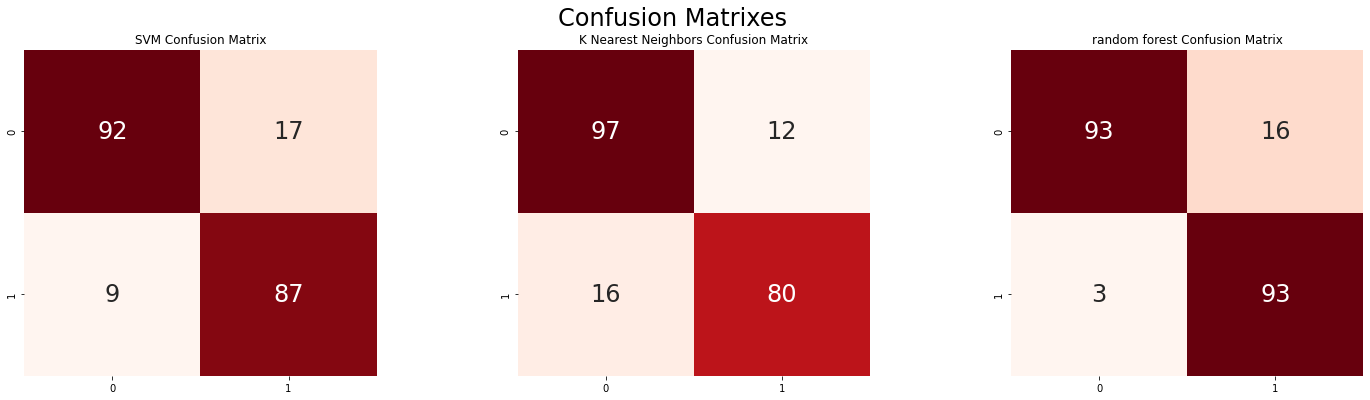

In [62]:
import seaborn as sns
plt.figure(figsize=(24,6))

plt.suptitle("Confusion Matrixes",fontsize=24)
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)

plt.subplot(1,3,1)
plt.title("SVM Confusion Matrix")
sns.heatmap(cm_svm,annot=True,cmap="Reds",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(1,3,2)
plt.title("K Nearest Neighbors Confusion Matrix")
sns.heatmap(cm_knn,annot=True,cmap="Reds",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(1,3,3)
plt.title("random forest Confusion Matrix")
sns.heatmap(cm_rf,annot=True,cmap="Reds",fmt="d",cbar=False, annot_kws={"size": 24})


plt.show()


In [123]:
from sklearn.decomposition import PCA



features = X.columns[:-1]

model = PCA(n_components=18).fit(X_train)
X_pc = model.transform(X_train)

# number of components
n_pcs= model.components_.shape[0]

# get the index of the most important feature on EACH component
# LIST COMPREHENSION HERE
most_important = [np.abs(model.components_[i]).argmax() for i in range(n_pcs)]

initial_feature_names = features
# get the names
most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]

# LIST COMPREHENSION HERE AGAIN
dic = {'PC{}'.format(i): most_important_names[i] for i in range(n_pcs)}

# build the dataframe
Selected = pd.DataFrame(dic.items())
Selected

,0,1
0,PC0,thal_2
1,PC1,slope_1
2,PC2,cp_0
3,PC3,cp_1
4,PC4,sex
5,PC5,fbs
6,PC6,exang
7,PC7,slope_0
8,PC8,thal_1
9,PC9,cp_3


In [128]:
X_train = X_train[most_important_names]
X_test = X_test[most_important_names]

In [129]:
svm = SVC(random_state = 1)
svm.fit(X_train, Y_train)

acc = svm.score(X_test,Y_test)*100
prediction = svm.predict(X_test)
# accuracies = []
# accuracies['SVM'] = acc
print("Test Accuracy of SVM Algorithm: {:.2f}%".format(acc))


accuracy = accuracy_score(Y_test, prediction)
precision = precision_score(Y_test, prediction)
recall = recall_score(Y_test, prediction)
f1 = f1_score(Y_test, prediction)
auc = roc_auc_score(Y_test, prediction)

print("accuracy is " + str(accuracy))
print("precision is " + str(precision))
print("recall is " + str(recall))
print("f1 score is " + str(f1))
print("area under the curve is " + str(auc))

Test Accuracy of SVM Algorithm: 88.78%
accuracy is 0.8878048780487805
precision is 0.8686868686868687
recall is 0.8958333333333334
f1 score is 0.8820512820512821
area under the curve is 0.888283639143731


In [130]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5)  # n_neighbors means k
knn.fit(X_train, Y_train)
prediction = knn.predict(X_test)

print("{} NN Score: {:.2f}%".format(2, knn.score(X_test, Y_test)*100))

accuracy = accuracy_score(Y_test, prediction)
precision = precision_score(Y_test, prediction)
recall = recall_score(Y_test, prediction)
f1 = f1_score(Y_test, prediction)
auc = roc_auc_score(Y_test, prediction)

print("accuracy is " + str(accuracy))
print("precision is " + str(precision))
print("recall is " + str(recall))
print("f1 score is " + str(f1))
print("area under the curve is " + str(auc))


2 NN Score: 86.83%
accuracy is 0.8682926829268293
precision is 0.8709677419354839
recall is 0.84375
f1 score is 0.8571428571428571
area under the curve is 0.866829128440367


In [131]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth=5, random_state = 1)
rf.fit(X_train, Y_train)

acc = rf.score(X_test,Y_test)*100
# accuracies['Random Forest'] = acc
prediction = rf.predict(X_test)

print("Random Forest Algorithm Accuracy Score : {:.2f}%".format(acc))

accuracy = accuracy_score(Y_test, prediction)
precision = precision_score(Y_test, prediction)
recall = recall_score(Y_test, prediction)
f1 = f1_score(Y_test, prediction)
auc = roc_auc_score(Y_test, prediction)

print("accuracy is " + str(accuracy))
print("precision is " + str(precision))
print("recall is " + str(recall))
print("f1 score is " + str(f1))
print("area under the curve is " + str(auc))

Random Forest Algorithm Accuracy Score : 93.17%
accuracy is 0.9317073170731708
precision is 0.91
recall is 0.9479166666666666
f1 score is 0.9285714285714285
area under the curve is 0.9326739296636085


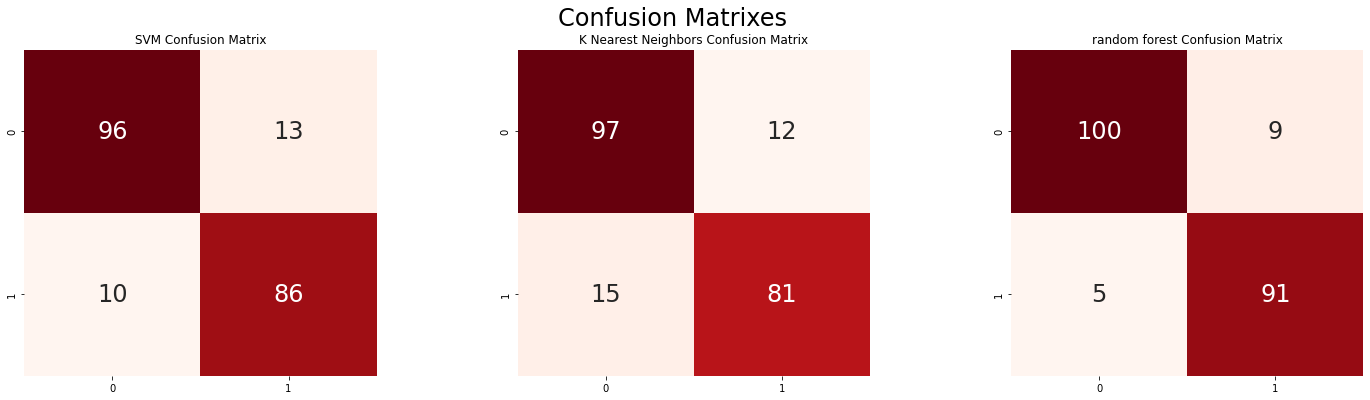

In [132]:
cm_svm = confusion_matrix(Y_test,svm.predict(X_test))
cm_knn = confusion_matrix(Y_test,knn.predict(X_test))
cm_rf = confusion_matrix(Y_test,rf.predict(X_test))

plt.figure(figsize=(24,6))

plt.suptitle("Confusion Matrixes",fontsize=24)
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)

plt.subplot(1,3,1)
plt.title("SVM Confusion Matrix")
sns.heatmap(cm_svm,annot=True,cmap="Reds",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(1,3,2)
plt.title("K Nearest Neighbors Confusion Matrix")
sns.heatmap(cm_knn,annot=True,cmap="Reds",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(1,3,3)
plt.title("random forest Confusion Matrix")
sns.heatmap(cm_rf,annot=True,cmap="Reds",fmt="d",cbar=False, annot_kws={"size": 24})


plt.show()